# kaggle泰坦尼克之灾

## 一.导入数据包与数据集

In [1]:
# 导入相关数据包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 二.数据分析

### 1.总体预览
了解每列数据的含义,数据的格式等

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#返回每列列名,该列非nan值个数,以及该列类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
#返回数值型变量的统计量
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2..数据初步分析,使用统计学与绘图
目的:初步了解数据之间的相关性,为构造特征工程以及模型建立做准备

In [7]:
#存活人数
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 1)数值型数据协方差,corr()函数
来个总览,快速了解个数据的相关性

In [8]:
#相关性协方差表,corr()函数,返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
train_corr = train.drop('PassengerId',axis=1).corr()
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


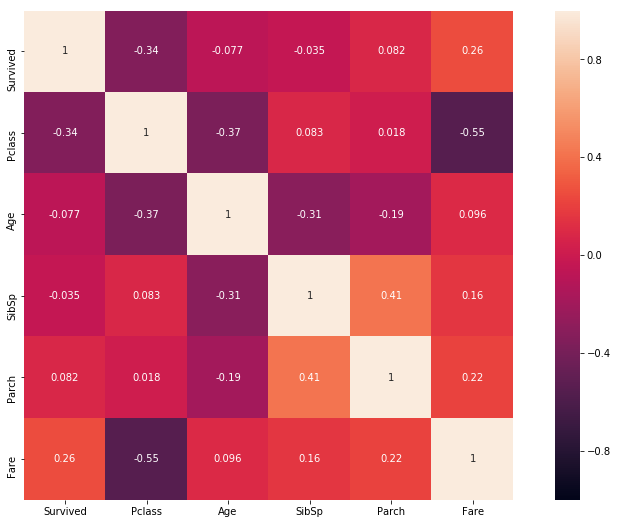

In [9]:
#画出相关性热力图
a = plt.subplots(figsize=(15,9))#调整画布大小
a = sns.heatmap(train_corr, vmin=-1, vmax=1 , annot=True , square=True)#画热力图

#### 2)各个数据与结果的关系
进一步探索分析各个数据与结果的关系

##### ①Pclass,乘客等级,1是最高级
结果分析:可以看出Survived和Pclass在Pclass=1的时候有较强的相关性（>0.5），所以最终模型中包含该特征。

In [10]:
train.groupby(['Pclass'])['Pclass','Survived'].mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


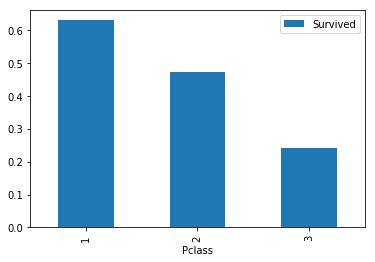

In [11]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

##### ②Sex,性别
结果分析:女性有更高的活下来的概率（74%）,保留该特征

In [12]:
train.groupby(['Sex'])['Sex','Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


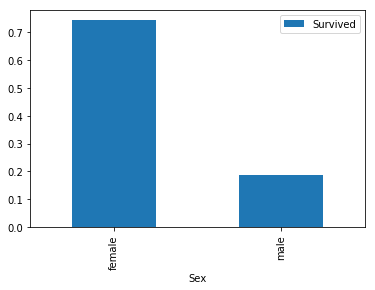

In [13]:
train.groupby(['Sex'])['Sex','Survived'].mean().plot.bar()

##### ③SibSp and Parch  兄妹配偶数/父母子女数
结果分析:这些特征与特定的值没有相关性不明显，最好是由这些独立的特征派生出一个新特征或者一组新特征

In [14]:
train[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [15]:
train[['Parch','Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


##### ④Age年龄与生存情况的分析.
结果分析:由图,可以看到年龄是影响生存情况的. 

但是年龄是有大部分缺失值的,缺失值需要进行处理,可以使用填充或者模型预测.

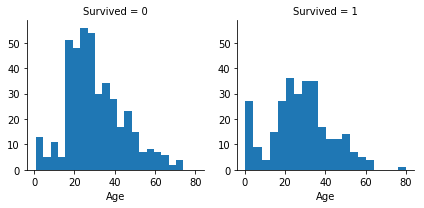

In [16]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

##### ⑤Embarked登港港口与生存情况的分析
结果分析:C地的生存率更高,这个也应该保留为模型特征.

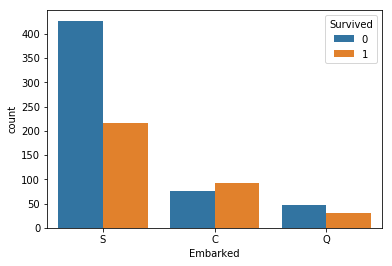

In [17]:
sns.countplot('Embarked',hue='Survived',data=train)

## 三.特征工程


In [18]:
#先将数据集合并,一起做特征工程(注意,标准化的时候需要分开处理)
#先将test补齐,然后通过pd.apped()合并
test['Survived'] = 0
train_test = train.append(test)

### ①Pclass,乘客等级,1是最高级
两种方式:一是该特征不做处理,可以直接保留.二是再处理:也进行分列处理(比较那种方式模型效果更好,就选那种)

In [19]:
train_test = pd.get_dummies(train_test,columns=['Pclass'])

### ②Sex,性别¶
无缺失值,直接分列

In [20]:
train_test = pd.get_dummies(train_test,columns=["Sex"])

### ③SibSp and Parch  兄妹配偶数/父母子女数
第一次直接保留:这两个都影响生存率,且都是数值型,先直接保存.

第二次进行两项求和,并进行分列处理.(兄妹配偶数和父母子女数都是认识人的数量,所以总数可能也会更好)(模型结果提高到了)

In [21]:
#这是剑豪模型后回来添加的新特征,模型的分数最终有所提高了.
train_test['SibSp_Parch'] = train_test['SibSp'] + train_test['Parch']

In [22]:
train_test = pd.get_dummies(train_test,columns = ['SibSp','Parch','SibSp_Parch']) 

### ④Embarked 
数据有极少量(3个)缺失值,但是在分列的时候,缺失值的所有列可以均为0,所以可以考虑不填充.

另外,也可以考虑用测试集众数来填充.先找出众数,再采用df.fillna()方法

In [23]:
train_test = pd.get_dummies(train_test,columns=["Embarked"])

### ⑤ Name
在数据的Name项中包含了对该乘客的称呼,将这些关键吃提取出来,然后做分列处理.

In [24]:
#从名字中提取出称呼： df['Name].str.extract()是提取函数,配合正则一起使用
train_test['Name'] = train_test['Name'].str.extract('.+,(.+)').str.extract( '^(.+?)\.').str.strip()

D:\Users\feng\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [25]:
#分列处理
train_test = pd.get_dummies(train_test,columns=['Name'])

### ⑥ Fare
该特征有缺失值,先找出缺失值的那调数据,然后用平均数填充

In [26]:
#从上面的分析,发现该特征train集无miss值,test有一个缺失值,先查看
train_test.loc[train_test["Fare"].isnull()]

,Age,Cabin,Fare,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess
152,60.5,NaN,NaN,1044,0,3701,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
#票价与pclass和Embarked有关,所以用train分组后的平均数填充
train.groupby(by=["Pclass","Embarked"]).Fare.mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [28]:
#用pclass=3和Embarked=S的平均数14.644083来填充
train_test["Fare"].fillna(14.435422,inplace=True)

### ⑦ Ticket
该列和名字做类似的处理,先提取,然后分列

In [29]:
#将Ticket提取字符列
#str.isnumeric()  如果S中只有数字字符，则返回True，否则返回False
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
train_test.drop('Ticket',inplace=True,axis=1)

In [30]:
#分列,此时nan值可以不做处理
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)

### ⑧ Age
1.该列有大量缺失值,考虑用一个回归模型进行填充.

2.在模型修改的时候,考虑到年龄缺失值可能影响死亡情况,用年龄是否缺失值来构造新特征

In [31]:
"""这是模型就好后回来增加的新特征
考虑年龄缺失值可能影响死亡情况,数据表明,年龄缺失的死亡率为0.19."""
train_test.loc[train_test["Age"].isnull()]['Survived'].mean()

0.19771863117870722

In [32]:
# 所以用年龄是否缺失值来构造新特征
train_test.loc[train_test["Age"].isnull() ,"age_nan"] = 1
train_test.loc[train_test["Age"].notnull() ,"age_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['age_nan'])

### 利用其他组特征量，采用机器学习算法来预测Age

In [33]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Columns: 106 entries, Age to age_nan_1.0
dtypes: float64(2), int64(2), object(1), uint8(101)
memory usage: 190.5+ KB


In [34]:
#创建没有['Age','Survived']的数据集
missing_age = train_test.drop(['Survived','Cabin'],axis=1)
#将Age完整的项作为训练集、将Age缺失的项作为测试集。
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]

In [35]:
#构建训练集合预测集的X和Y值
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

In [36]:
# 先将数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#用测试集训练并标准化
ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)

In [37]:
#使用贝叶斯预测年龄
from sklearn import linear_model
lin = linear_model.BayesianRidge()

In [38]:
lin.fit(missing_age_X_train,missing_age_Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [39]:
#预测出age的缺失值
lin.predict(missing_age_X_test)

array([ 33.79979117,  33.75859289,  31.67228356,  28.41364403,
        24.66050474,  29.66967991,  44.45789533,  24.65742239,
        28.40803166,  28.40891319,  29.66164374,  31.3705937 ,
        24.64896353,  25.95865778,  41.46548379,  42.87561316,
         6.63095616,  29.64317549,  29.64359818,  24.62946614,
        25.66934785,  29.63344755,  29.6290774 ,  29.62492095,
        22.26780038,  29.61878554,  33.72702453,  15.5532334 ,
        27.01969883,  29.59545735,  29.60183929,  14.66014478,
        39.93319373,  44.05891082,   4.17501946,  23.56059929,
        29.95011409,  41.48494829,  34.54633645,  33.68754987,
        24.56381105,  32.67136786,  31.2262681 ,  29.56027871,
        13.05742841,  20.30699344,  16.76547646,  22.13801761,
        29.54092078,  46.35140852,  33.65145875,  24.52659209,
        41.31544808,  24.52095285,  33.52879552,  41.27556191,
        42.74534678,  41.29645909,  24.50629084,  31.19244924,
        28.58351897,  31.26097505,  31.43021325,  32.60

In [40]:
#利用loc将预测值填入数据集
train_test.loc[(train_test['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)

### ⑨ Cabin
cabin项缺失太多，只能将有无Cain首字母进行分类,缺失值为一类,作为特征值进行建模,也可以考虑直接舍去该特征

In [41]:
#cabin项缺失太多，只能将有无Cain首字母进行分类,缺失值为一类,作为特征值进行建模
train_test['Cabin'] = train_test['Cabin'].apply(lambda x:str(x)[0] if pd.notnull(x) else x)
train_test = pd.get_dummies(train_test,columns=['Cabin'])

### ⑩ 特征工程处理完了,划分数据集

In [42]:
train_data = train_test[:891]
test_data = train_test[891:]
train_data_X = train_data.drop(['Survived'],axis=1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'],axis=1)

## 四 建立模型

### 数据标准化
1.线性模型需要用标准化的数据建模,而数类模型不需要标准化的数据

2.处理标准化的时候,注意将测试集的数据transform到test集上

In [43]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)

### 开始建模
1.可选单个模型模型有随机森林,逻辑回归,svm,xgboost,gbdt等.

2.也可以将多个模型组合起来,进行模型融合,比如voting,stacking等方法

3.好的特征决定模型上限,好的模型和参数可以无线逼近上限.

4.我测试了多种模型,模型结果最高的随机森林,最高有0.8.

## 随机森林

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150,min_samples_leaf=2,max_depth=6,oob_score=True)

rf.fit(train_data_X,train_data_Y)

rf.oob_score_

test["Survived"] = rf.predict(test_data_X)
RF = test[['PassengerId','Survived']].set_index('PassengerId')
RF.to_csv('RF1.csv')

### LogisticRegression

### SVM

### xgboost

### GBDT

### 模型融合voting

### 模型融合stacking